In [31]:
import tensorflow.compat.v1 as tf1
# import tensorflow as tf2
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
config = tf1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.05
session = tf1.Session(config=config)

2023-05-22 18:24:51.639318: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4055 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:b3:00.0, compute capability: 8.0


In [32]:
import warnings

# 오류 경고 무시하기
warnings.filterwarnings(action='ignore')

# 오류 메세지 다시 보이게 하기
#warnings.filterwarnings(action='default')

In [33]:
import os
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

path = '/home/a202192006/상추 데이터/train_target'
all_files = glob(os.path.join(path, "*.csv")) # path 디렉토리에 있는 모든 csv 파일의 경로를 가져옴

# 모든 CSV 파일을 읽어들인 후 데이터프레임으로 변환
df_from_each_file = (pd.read_csv(f) for f in all_files)
df_train_target = pd.concat(df_from_each_file, ignore_index=True)


In [34]:
df_train_target.drop('DAT', axis=1, inplace=True)

In [35]:
df_train_target

,predicted_weight_g
0,4.223077
1,4.991709
2,4.966084
3,5.005155
4,6.079261
...,...
779,60.337109
780,61.687644
781,63.378628
782,62.139250


In [36]:
import os
import pandas as pd
from glob import glob

path = '/home/a202192006/상추 데이터/train_input'
all_files = glob(os.path.join(path, "*.csv")) # path 디렉토리에 있는 모든 csv 파일의 경로를 가져옴

# 모든 CSV 파일을 읽어들인 후 데이터프레임으로 변환
df_from_each_file = (pd.read_csv(f) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)


In [37]:
df.drop('H', axis=1, inplace=True)

In [38]:
df.drop('obs_time', axis=1, inplace=True)

# 이상치 처리(보간법)

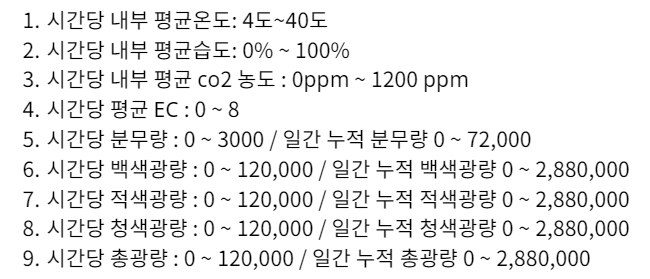

In [39]:
df.describe()

,DAT,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,일간누적분무량,시간당백색광량,일간누적백색광량,시간당적색광량,일간누적적색광량,시간당청색광량,일간누적청색광량,시간당총광량,일간누적총광량
count,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000
mean,13.500000,26.027719,63.935090,498.860695,1.507566,523.627918,6365.916673,6315.562930,72910.240149,1571.862912,18201.358998,1241.905981,14139.184959,9129.331824,105250.784106
std,8.077962,3.948988,11.657905,120.421248,1.042010,544.323281,6903.680044,8188.067575,86040.447105,2937.252667,34386.384982,2474.426437,27743.227265,9175.427411,97397.224913
min,0.000000,0.000000,0.000000,60.400000,0.000000,-653.260000,0.000000,-138371.246100,0.000000,-8793.607200,0.000000,-18570.857500,0.000000,-165735.710800,0.000000
25%,6.750000,23.971250,57.494583,420.245833,0.929581,0.000000,1234.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7280.962850
50%,13.500000,26.291667,62.118333,473.983333,1.308517,252.000000,3360.485000,0.000000,23205.750000,0.000000,0.000000,0.000000,0.000000,9242.350000,92172.360000
75%,20.250000,28.106667,73.157166,551.105952,2.291322,769.000000,9990.570000,18236.625400,145422.700000,1494.698100,17529.296400,1306.461000,18484.700000,18255.190000,177491.499450
max,27.000000,42.643334,93.350002,1714.850000,5.462324,3144.130000,42855.230000,18564.600000,292014.969800,9928.800000,200561.760000,9399.000000,190016.450000,37892.400000,559488.881000


# 시간당 내부 평균 온도 : 4 ~ 40

In [40]:
df.loc[(df['내부온도관측치'] < 4) | (df['내부온도관측치'] > 40), '내부온도관측치'] = np.nan
df['내부온도관측치'] = df['내부온도관측치'].interpolate(method='linear')

In [41]:
# import matplotlib.pyplot as plt

# # original 데이터 그리기
# plt.plot(df['내부온도관측치'].values, color='green', label='Original')

# # 조건에 해당하는 값만 빨간색으로 표시
# mask = (df['내부온도관측치'] < 4) | (df['내부온도관측치'] > 40)
# plt.plot(df['내부온도관측치'][mask].index, df['내부온도관측치'][mask].values, 'ro', label='Outliers')

# # 선형보간 후 데이터 그리기
# df = df['내부온도관측치'].interpolate(method='linear')
# plt.plot(df.values, color='blue', label='Interpolated')

# plt.legend()
# plt.show()


# 시간당 내부 평균습도 : 0% ~ 100%

In [42]:
df.loc[(df['내부습도관측치'] < 0) | (df['내부습도관측치'] > 100), '내부습도관측치'] = np.nan
df['내부습도관측치'] = df['내부습도관측치'].interpolate(method='linear')

# 시간당 내부 평균 co2 농도 : 0ppm ~ 1200 ppm

In [43]:
df.loc[(df['co2관측치'] < 0) | (df['co2관측치'] > 1200), 'co2관측치'] = np.nan
df['co2관측치'] = df['co2관측치'].interpolate(method='linear')

# 시간당 평균 EC : 0 ~ 8

In [44]:
df.loc[(df['ec관측치'] < 0) | (df['ec관측치'] > 8), 'ec관측치'] = np.nan
df['ec관측치'] = df['ec관측치'].interpolate(method='linear')



# 시간당 분무량 : 0 ~ 3000 / 일간 누적 분무량 0 ~ 72,000

In [45]:
df.loc[(df['시간당분무량'] < 0) | (df['시간당분무량'] > 3000), '시간당분무량'] = np.nan
df['시간당분무량'] = df['시간당분무량'].interpolate(method='linear')

df.loc[(df['일간누적분무량'] < 0) | (df['일간누적분무량'] > 72000), '일간누적분무량'] = np.nan
df['일간누적분무량'] = df['일간누적분무량'].interpolate(method='linear')

# 시간당 백색광량 : 0 ~ 120,000 / 일간 누적 백색광량 0 ~ 2,880,000
# 시간당 적색광량 : 0 ~ 120,000 / 일간 누적 적색광량 0 ~ 2,880,000 
# 시간당 청색광량 : 0 ~ 120,000 / 일간 누적 청색광량 0 ~ 2,880,000

In [46]:
df.loc[(df['시간당백색광량'] < 0) | (df['시간당백색광량'] > 120000), '시간당백색광량'] = np.nan
df['시간당백색광량'] = df['시간당백색광량'].interpolate(method='linear')

df.loc[(df['일간누적백색광량'] < 0) | (df['일간누적백색광량'] > 2880000), '일간누적백색광량'] = np.nan
df['일간누적백색광량'] = df['일간누적백색광량'].interpolate(method='linear')

df.loc[(df['시간당적색광량'] < 0) | (df['시간당적색광량'] > 120000), '시간당적색광량'] = np.nan
df['시간당적색광량'] = df['시간당적색광량'].interpolate(method='linear')

df.loc[(df['일간누적적색광량'] < 0) | (df['일간누적적색광량'] > 2880000), '일간누적적색광량'] = np.nan
df['일간누적적색광량'] = df['일간누적적색광량'].interpolate(method='linear')

df.loc[(df['시간당청색광량'] < 0) | (df['시간당청색광량'] > 120000), '시간당청색광량'] = np.nan
df['시간당청색광량'] = df['시간당청색광량'].interpolate(method='linear')

df.loc[(df['일간누적청색광량'] < 0) | (df['일간누적청색광량'] > 2880000), '일간누적청색광량'] = np.nan
df['일간누적청색광량'] = df['일간누적청색광량'].interpolate(method='linear')

# 시간당 총광량 : 0 ~ 120,000 / 일간 누적 총광량 0 ~ 2,880,000

In [47]:
df.loc[(df['시간당총광량'] < 0) | (df['시간당총광량'] > 120000), '시간당총광량'] = np.nan
df['시간당총광량'] = df['시간당총광량'].interpolate(method='linear')

df.loc[(df['일간누적총광량'] < 0) | (df['일간누적총광량'] > 2880000), '일간누적총광량'] = np.nan
df['일간누적총광량'] = df['일간누적총광량'].interpolate(method='linear')

In [48]:
df.describe()

,DAT,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,일간누적분무량,시간당백색광량,일간누적백색광량,시간당적색광량,일간누적적색광량,시간당청색광량,일간누적청색광량,시간당총광량,일간누적총광량
count,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000,18816.000000
mean,13.500000,26.027349,63.935090,497.403894,1.507566,523.682558,6365.916673,6323.873473,72910.240149,1572.430914,18201.358998,1243.069492,14139.184959,9139.373879,105250.784106
std,8.077962,3.942320,11.657905,110.824173,1.042010,543.897762,6903.680044,8120.283264,86040.447105,2936.281308,34386.384982,2470.253289,27743.227265,9087.008979,97397.224913
min,0.000000,6.921053,0.000000,60.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.750000,23.971250,57.494583,420.245833,0.929581,0.000000,1234.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7280.962850
50%,13.500000,26.291667,62.118333,473.983333,1.308517,252.000000,3360.485000,0.000000,23205.750000,0.000000,0.000000,0.000000,0.000000,9242.350000,92172.360000
75%,20.250000,28.106667,73.157166,551.105952,2.291322,769.000000,9990.570000,18236.625400,145422.700000,1495.939200,17529.296400,1306.461000,18484.700000,18255.190000,177491.499450
max,27.000000,39.935001,93.350002,1195.800000,5.462324,2951.230000,42855.230000,18564.600000,292014.969800,9928.800000,200561.760000,9399.000000,190016.450000,37892.400000,559488.881000


In [49]:
# 데이터프레임의 열들을 선택
selected_columns = ['DAT','내부온도관측치', '내부습도관측치', 'co2관측치', 'ec관측치', '시간당분무량', '일간누적분무량', '시간당백색광량', '일간누적백색광량', '시간당적색광량', '일간누적적색광량', '시간당청색광량', '일간누적청색광량', '시간당총광량', '일간누적총광량']

# 인덱스 숫자를 기준으로 24개씩 평균을 구하고자 하는 열들의 평균을 계산
df_train = df.groupby(df.index // 24)[selected_columns].mean()
df_train

,DAT,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,일간누적분무량,시간당백색광량,일간누적백색광량,시간당적색광량,일간누적적색광량,시간당청색광량,일간누적청색광량,시간당총광량,일간누적총광량
0,0.0,24.750598,74.553531,468.663984,2.009225,173.250000,2068.500000,7915.739167,104554.795833,0.0,0.0,0.0,0.0,7915.739167,104554.795833
1,1.0,24.718562,75.813026,467.898039,1.320214,173.250000,2068.500000,4344.632083,31869.230000,0.0,0.0,0.0,0.0,4344.632083,31869.230000
2,2.0,25.039280,76.005171,470.140206,1.936346,173.250000,2068.500000,5143.941250,49144.621667,0.0,0.0,0.0,0.0,5143.941250,49144.621667
3,3.0,25.004200,75.938089,467.233232,1.928179,173.250000,2068.500000,6587.854583,60386.518333,0.0,0.0,0.0,0.0,6587.854583,60386.518333
4,4.0,24.960034,74.195509,440.219073,1.940690,173.250000,2068.500000,10584.400417,121417.640833,0.0,0.0,0.0,0.0,10584.400417,121417.640833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,23.0,25.593855,82.784013,540.026032,1.759261,207.429167,2169.116667,10365.621762,118647.389967,0.0,0.0,0.0,0.0,10365.621762,118647.389967
780,24.0,26.451492,83.142655,558.483298,0.715688,207.429167,2200.616667,10528.706617,120730.750633,0.0,0.0,0.0,0.0,10528.706617,120730.750633
781,25.0,27.923220,83.493724,473.261732,0.154382,207.429167,2247.866667,10658.014212,122085.192908,0.0,0.0,0.0,0.0,10658.014212,122085.192908
782,26.0,26.883958,83.133190,489.669514,0.000000,212.679167,2268.866667,10635.968750,121894.647917,0.0,0.0,0.0,0.0,10635.968750,121894.647917


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# df = df.drop(['DAT'], axis=1)

scaler = MinMaxScaler()
df_train = scaler.fit_transform(df_train)

df_train = pd.DataFrame(df_train, columns=df.columns)

# 데이터 분류

In [51]:
train_size = int(len(df_train) * 0.7)
# train_size = 644
X_train, y_train = df_train[:train_size], df_train_target[:train_size]
X_test, y_test = df_train[train_size:], df_train_target[train_size:]

# 모델

### 랜덤 포레스트

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("랜덤포레스트 MSE:", mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("랜덤포레스트 RMSE:", rmse)


variance_score = r2_score(y_test, y_pred)
print("랜덤포레스트 Variance Score:", variance_score)

랜덤포레스트 MSE: 266.8536248250803
랜덤포레스트 RMSE: 16.335655016713602
랜덤포레스트 Variance Score: 0.8262944242539715


### 랜덤포레스트 그리드 서치

In [53]:
from sklearn.model_selection import GridSearchCV
params = {
'n_estimators':[100],
'max_depth' : [6, 8, 10, 12], 
'min_samples_leaf' : [8, 12, 18 ],
'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 16, 'n_estimators': 100}
최고 예측 정확도: 0.4176


### AdaBoost

In [54]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

clf = AdaBoostRegressor(n_estimators=30, 
    random_state=10, 
    learning_rate=0.1)

clf.fit(X_train, y_train)

pred = clf.predict(X_test)

mse = mean_squared_error(y_test, pred)
print('AdaBoost MSE: {:.4f}'.format(mse))

rmse = np.sqrt(mse)
print('AdaBoost RMSE: {:.4f}'.format(rmse))

accuracy = clf.score(X_test, y_test)
print('AdaBoost Accuracy: {:.4f}'.format(accuracy))

AdaBoost MSE: 331.3717
AdaBoost RMSE: 18.2036
AdaBoost Accuracy: 0.7843


### XGBoost

In [55]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create an instance of XGBRegressor
XG_model = xgb.XGBRegressor()

# Fit the model on the training data
XG_model.fit(X_train, y_train)

# Make predictions on the testing data
pred = model.predict(X_test)

mse = mean_squared_error(y_test, pred)
print('XGBoost MSE: {:.4f}'.format(mse))

rmse = np.sqrt(mse)
print('XGBoost RMSE: {:.4f}'.format(rmse))

accuracy = clf.score(X_test, y_test)
print('XGBoost Accuracy: {:.4f}'.format(accuracy))

XGBoost MSE: 266.8536
XGBoost RMSE: 16.3357
XGBoost Accuracy: 0.7843


#### 모델 예측 후 피처 중요도를 동일하게 plot_importance() API를 통해 시각화

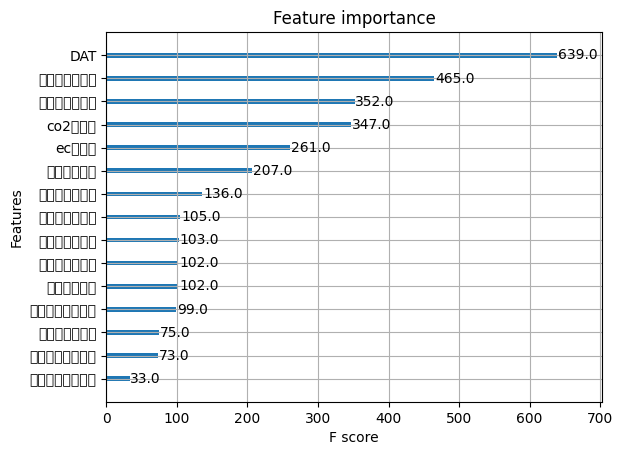

In [56]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

# Plot feature importance
xgb.plot_importance(XG_model)
plt.show()


### GBM

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor


gb_clf = GradientBoostingRegressor(random_state=0)
gb_clf.fit(X_train, y_train)


pred = gb_clf.predict(X_test)


mse = mean_squared_error(y_test, pred)


rmse = np.sqrt(mse)


variance_score = r2_score(y_test, pred)

print("GBM MSE:", mse)
print("GBM RMSE:", rmse)
print("GBM Variance Score:", variance_score)


GBM MSE: 294.7300689537755
GBM RMSE: 17.16770424237835
GBM Variance Score: 0.8081485445406977


### LightGBM

In [58]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

lgbm_wrapper = LGBMRegressor(n_estimators=400)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, 
                 eval_metric="logloss", 
                 eval_set=evals, verbose=True)

preds = lgbm_wrapper.predict(X_test)


# 예측 값 계산
preds = lgbm_wrapper.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, preds))
print('RMSE:', rmse)

# 결정 계수 계산
r2 = r2_score(y_test, preds)
print('R-squared:', r2)

[1]	valid_0's l2: 1280.46
[2]	valid_0's l2: 1088.99
[3]	valid_0's l2: 941.182
[4]	valid_0's l2: 824.78
[5]	valid_0's l2: 742.731
[6]	valid_0's l2: 671.739
[7]	valid_0's l2: 588.415
[8]	valid_0's l2: 528.296
[9]	valid_0's l2: 486.867
[10]	valid_0's l2: 451.93
[11]	valid_0's l2: 411.872
[12]	valid_0's l2: 392.048
[13]	valid_0's l2: 364.356
[14]	valid_0's l2: 355.885
[15]	valid_0's l2: 333.74
[16]	valid_0's l2: 328.849
[17]	valid_0's l2: 327.117
[18]	valid_0's l2: 319.187
[19]	valid_0's l2: 310.083
[20]	valid_0's l2: 304.067
[21]	valid_0's l2: 300.323
[22]	valid_0's l2: 298.073
[23]	valid_0's l2: 301.935
[24]	valid_0's l2: 299.333
[25]	valid_0's l2: 295.992
[26]	valid_0's l2: 294.631
[27]	valid_0's l2: 296.808
[28]	valid_0's l2: 295.726
[29]	valid_0's l2: 296.529
[30]	valid_0's l2: 295.404
[31]	valid_0's l2: 298.167
[32]	valid_0's l2: 296.371
[33]	valid_0's l2: 297.352
[34]	valid_0's l2: 297.989
[35]	valid_0's l2: 295.007
[36]	valid_0's l2: 297.016
[37]	valid_0's l2: 301.144
[38]	valid_0'

#### LightGBM 그리드 서치

In [59]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# LightGBM 모델 생성
lgbm = LGBMRegressor(n_estimators=400)

# 파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print('Best Model:', best_model)
print('Best Parameters:', best_params)

# 최적 모델을 사용하여 예측 수행
preds = best_model.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, preds))
print('RMSE:', rmse)

# 결정 계수 계산
r2 = r2_score(y_test, preds)
print('R-squared:', r2)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

Best Model: LGBMRegressor(learning_rate=0.05, max_depth=5, min_child_samples=30,
              n_estimators=400)
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_child_samples': 30}
RMSE: 17.099617289646094
R-squared: 0.8096672890110214


In [61]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lgbm_wrapper = LGBMRegressor(n_estimators=400, learning_rate=0.05, max_depth=5, min_child_samples=30)

evals = [(X_test, y_test)]

lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

preds = lgbm_wrapper.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print('RMSE:', rmse)

r2 = r2_score(y_test, preds)
print('R-squared:', r2)

[1]	valid_0's l2: 1414.15
[2]	valid_0's l2: 1305.18
[3]	valid_0's l2: 1201.08
[4]	valid_0's l2: 1108.4
[5]	valid_0's l2: 1021.64
[6]	valid_0's l2: 947.771
[7]	valid_0's l2: 881.653
[8]	valid_0's l2: 818.078
[9]	valid_0's l2: 763.083
[10]	valid_0's l2: 716.038
[11]	valid_0's l2: 667.652
[12]	valid_0's l2: 627.592
[13]	valid_0's l2: 596.705
[14]	valid_0's l2: 569.67
[15]	valid_0's l2: 531.237
[16]	valid_0's l2: 505.954
[17]	valid_0's l2: 480.012
[18]	valid_0's l2: 462.393
[19]	valid_0's l2: 444.774
[20]	valid_0's l2: 433.17
[21]	valid_0's l2: 418.898
[22]	valid_0's l2: 404.915
[23]	valid_0's l2: 384.368
[24]	valid_0's l2: 373.205
[25]	valid_0's l2: 355.005
[26]	valid_0's l2: 351.486
[27]	valid_0's l2: 342.445
[28]	valid_0's l2: 328.748
[29]	valid_0's l2: 322.417
[30]	valid_0's l2: 318.043
[31]	valid_0's l2: 307.399
[32]	valid_0's l2: 306.443
[33]	valid_0's l2: 300.916
[34]	valid_0's l2: 297.743
[35]	valid_0's l2: 289.605
[36]	valid_0's l2: 287.031
[37]	valid_0's l2: 287.814
[38]	valid_0'

### CatBoost
- learn: 학습 데이터셋에 대한 평균 제곱근 오차(RMSE) 값입니다. 첫 번째 줄은 첫 번째 반복(iteration)에서의 오차를, 두 번째 줄은 두 번째 반복에서의 오차를 나타냅니다. 오차는 낮을수록 좋습니다.

- total: 각 반복에서의 경과 시간을 나타냅니다.

- Predictions: 테스트 데이터에 대한 예측 결과입니다. 각 샘플에 대한 예측 값이 출력되어 있습니다.

In [60]:
import numpy as np
from catboost import CatBoostRegressor, Pool

# 데이터 분할
train_size = int(len(df_train) * 0.7)
X_train, y_train = df_train[:train_size], df_train_target[:train_size]
X_test, y_test = df_train[train_size:], df_train_target[train_size:]

# 데이터를 CatBoost의 Pool 객체로 변환
train_pool = Pool(X_train, label=y_train)
test_pool = Pool(X_test, label=y_test)

# CatBoostRegressor 모델 초기화
model = CatBoostRegressor(iterations=2, depth=2, learning_rate=1, loss_function='RMSE', verbose=True)

# 모델 훈련
model.fit(train_pool)

# 테스트 데이터에 대한 예측 수행
preds = model.predict(test_pool)

print("Predictions:", preds)


0:	learn: 27.2278032	total: 1.22ms	remaining: 1.22ms
1:	learn: 23.8398242	total: 1.71ms	remaining: 0us
Predictions: [  4.14292102  46.79033603  46.79033603  46.79033603  46.79033603
  46.79033603  46.79033603  46.79033603  46.79033603  46.79033603
  46.79033603  46.79033603   4.14292102  21.22424353  21.22424353
  21.22424353  21.22424353  21.22424353  21.22424353  21.22424353
  21.22424353  21.22424353  21.22424353  21.22424353  21.22424353
  21.22424353  21.22424353  21.22424353  21.22424353  98.05042399
  98.05042399  98.05042399  98.05042399  98.05042399  98.05042399
  98.05042399  98.05042399  98.05042399  98.05042399  98.05042399
   4.14292102   4.14292102  21.47737197  21.47737197  48.56836004
  48.56836004  48.56836004  48.56836004  48.56836004  48.56836004
  48.56836004  48.56836004  48.56836004  48.56836004  48.56836004
  48.56836004  21.47737197  64.12478698  64.12478698  46.79033603
  91.21577505  91.21577505  91.21577505  64.12478698  64.12478698
  91.21577505  64.12478698